Import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


Import and preview the titanic dataset

In [18]:
titanic = pd.read_csv(r"C:\Users\chide\Documents\Datasets\Titanic Dataset.csv")


In [35]:
column_count = titanic.columns
column_count = len(column_count)
print (f'Total number of columns is {column_count}')

Total number of columns is 14


In [19]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Remove duplicates

In [20]:
dedupe = titanic.drop_duplicates
print('Duplicates removed successfully')

Duplicates removed successfully


Set to view All columns and rows

In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Objectives: \
To Investigate the relationship between factors responsible for the survival & the Gender, Social Status and age of passengers.

EDA \
Total number of Passengers

In [22]:
passenger_count = len(titanic['Name'])
passenger_count

print('Total number of passengers recorded was',passenger_count)

Total number of passengers recorded was 891


Gender Distribution

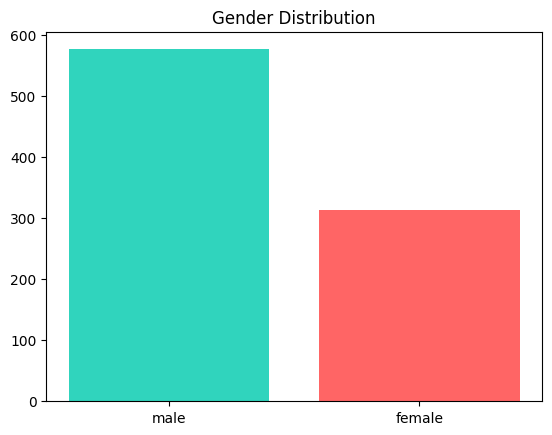

There was a total of 577 Males and 314 Females recorded.


In [23]:
data = titanic['Sex'].value_counts()
x = data.index
p_count = data.values
clr = ('#30D4BD','#FF6565')
plt.bar (x, p_count, color = clr)
plt.title('Gender Distribution')
plt.show()

print(f'There was a total of {p_count[0]} Males and {p_count[1]} Females recorded.')

Survival / Death Rate

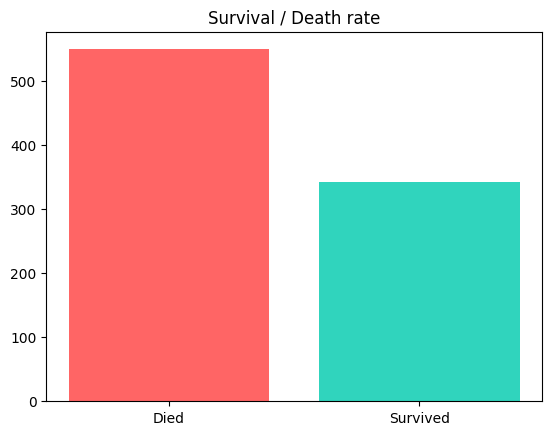

While 61.62% did not survive, 38.38% survived the accident.


In [24]:
titanic['Survived'] = titanic['Survived'].replace ({0 : 'Died', 1 :'Survived'})

death_rate = titanic['Survived'].value_counts()
x = death_rate.index
y = death_rate.values
clr = ('#FF6565', '#30D4BD')
plt.bar(x, y, color = clr)
plt.title('Survival / Death rate')
plt.show()

print(f'While {y[0] / passenger_count * 100:.2f}% did not survive, {y[1] / passenger_count * 100:.2f}% survived the accident.')

Survival / Death distribution \
by gender

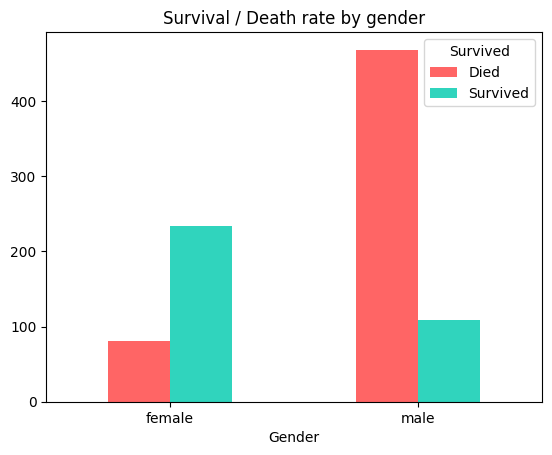

As a result of the fatal accident, 25.80% of females onboard lost their lives 
while 74.20% of females were spared. 
The male gender was mostly affected with 81.11% losing their lives 
and only 18.89% of males surviving the accident.


In [25]:
grouped = titanic.groupby(['Sex', 'Survived']).size().unstack()

clr = ('#FF6565', '#30D4BD')
ax = grouped.plot(kind = 'bar', stacked = False, color = clr)
plt.xticks(rotation = 0)
plt.title('Survival / Death rate by gender')
plt.xlabel('Gender')
plt.show()


male_death = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 'Died')]
male_death_count = len(male_death) / p_count[0] * 100
male_survival = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 'Survived')]
male_survival_count = len(male_survival) / p_count[0] * 100

female_death = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 'Died')]
female_death_count = len(female_death) / p_count[1] * 100
female_survival = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 'Survived')]
female_survival_count = len(female_survival) / p_count[1] * 100

print(f'As a result of the fatal accident, {female_death_count:.2f}% of females onboard lost their lives ')
print(f'while {female_survival_count:.2f}% of females were spared. ')
print(f'The male gender was mostly affected with {male_death_count:.2f}% losing their lives ')
print(f'and only {male_survival_count:.2f}% of males surviving the accident.')

Class Distribution


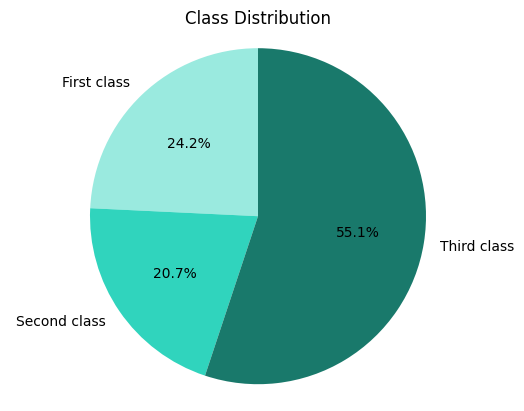

The passengers were divided into 3 classes namely,
The first class which made up 24.24% of the total passengers,
The second class, which made up 20.65% and
The third class, which had the most passengers with 55.11%.


In [26]:
titanic['Pclass_tag'] = titanic['Pclass'].replace({1 : 'First class', 2 : 'Second class', 3 : 'Third class'})

pclass_dist = titanic['Pclass_tag'].value_counts().sort_index()
pclass_x = pclass_dist.index
pclass_y = pclass_dist.values
pclass_clr = ('#9AEADF', '#30D4BD', '#19796B')
plt.pie(pclass_y, labels = pclass_x, colors = pclass_clr, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

print(f'The passengers were divided into 3 classes namely,')
print(f'The first class which made up {pclass_y[0] / passenger_count * 100:.2f}% of the total passengers,')
print(f'The second class, which made up {pclass_y[1] / passenger_count * 100:.2f}% and')
print(f'The third class, which had the most passengers with {pclass_y[2] / passenger_count * 100:.2f}%.')

Survilval / Death rate \
by Class


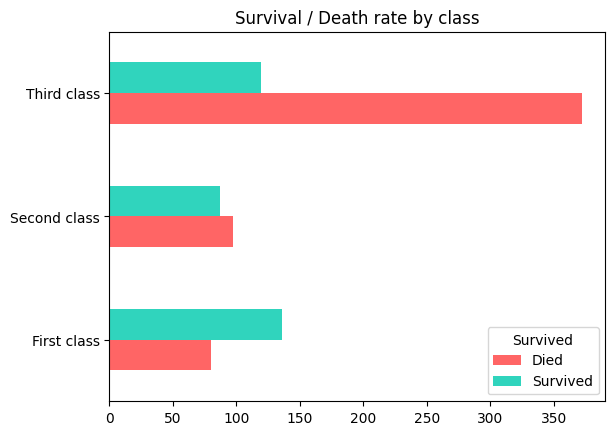

In the First class, there were 216 passengers onboard.
37.04% of passengers in First class lost their lives, while 62.96% of passengers survived the tragedy.

In the Second class, there were 184 passengers onboard.
52.72% of passengers in Second class lost their lives, while 47.28% of passengers survived the tragedy.

And lastly in the Third class, there were 491 passengers onboard.
75.76% of passengers in Third class lost their lives, while 24.24% of passengers survived the tragedy.


In [27]:
grouped_class = titanic.groupby(['Pclass_tag', 'Survived']).size().unstack()
ax = grouped_class.plot(kind = 'barh', stacked = False, color = clr)
plt.ylabel('')
plt.title('Survival / Death rate by class')
plt.show()


third_class_death = titanic[(titanic['Pclass_tag'] == 'Third class') & (titanic['Survived'] == 'Died')]
third_class_death_count = len(third_class_death) / pclass_y[2] * 100
third_class_survival = titanic[(titanic['Pclass_tag'] == 'Third class') & (titanic['Survived'] == 'Survived')]
third_class_survival_count = len(third_class_survival) / pclass_y[2] * 100

second_class_death = titanic[(titanic['Pclass_tag'] == 'Second class') & (titanic['Survived'] == 'Died')]
second_class_death_count = len(second_class_death) / pclass_y[1] * 100
second_class_survival = titanic[(titanic['Pclass_tag'] == 'Second class') & (titanic['Survived'] == 'Survived')]
second_class_survival_count = len(second_class_survival) / pclass_y[1] * 100

first_class_death = titanic[(titanic['Pclass_tag'] == 'First class') & (titanic['Survived'] == 'Died')]
first_class_death_count = len(first_class_death) / pclass_y[0] * 100
first_class_survival = titanic[(titanic['Pclass_tag'] == 'First class') & (titanic['Survived'] == 'Survived')]
first_class_survival_count = len(first_class_survival) / pclass_y[0] * 100


print(f"In the First class, there were {pclass_y[0]} passengers onboard.")
print(f"{first_class_death_count:.2f}% of passengers in First class lost their lives, while "
          f"{first_class_survival_count:.2f}% of passengers survived the tragedy.")
print()
print(f"In the Second class, there were {pclass_y[1]} passengers onboard.")
print(f"{second_class_death_count:.2f}% of passengers in Second class lost their lives, while "
          f"{second_class_survival_count:.2f}% of passengers survived the tragedy.")
print()
print(f"And lastly in the Third class, there were {pclass_y[2]} passengers onboard.")
print(f"{third_class_death_count:.2f}% of passengers in Third class lost their lives, while "
          f"{third_class_survival_count:.2f}% of passengers survived the tragedy.")

Age distribution

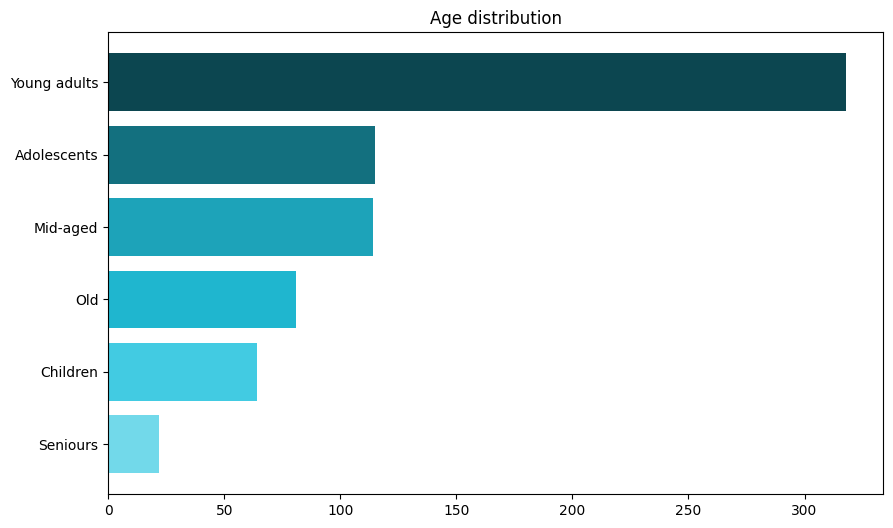

The passenger have been categorized into 6 age groups. Starting from the least:
The dataset records 22 passengers in the seniour category.

64 were recorded as children.

81 were recorded in the Old age category.

114 were recorded in the middle-aged category.

115 were recorded as adolescents

And lastly, Most passengers, 318 in total, were Young adults.


In [28]:
age_bins = [0, 10, 20, 35, 45, 60, float('inf')]
age_label = ['Children', 'Adolescents', 'Young adults', 'Mid-aged', 'Old', 'Seniours']
titanic['Age category'] = pd.cut(titanic['Age'], bins = age_bins, labels = age_label)

age_data = titanic['Age category'].value_counts().sort_values()
age_x = age_data.index
age_y = age_data.values
age_clrs = ('#72D9EA', '#42CBE2', '#1FB6CF', '#1DA3B9', '#13707F', '#0C4650')
plt.figure(figsize = (10, 6))
plt.barh(age_x, age_y, color = age_clrs)
plt.title('Age distribution')
plt.show()

print(f"The passenger have been categorized into 6 age groups. Starting from the least:")
print(f"The dataset records {age_y[0]} passengers in the seniour category.")
print()
print(f"{age_y[1]} passengers were recorded as children.")
print()
print(f"{age_y[2]} passengers were recorded in the Old age category.")
print()
print(f"{age_y[3]} passengers were recorded in the middle-aged category.")
print()
print(f"{age_y[4]} passengers were recorded as adolescents")
print()
print(f"And lastly, Most passengers, {age_y[5]} in total, were Young adults.")

Death distribution \
 by Age group

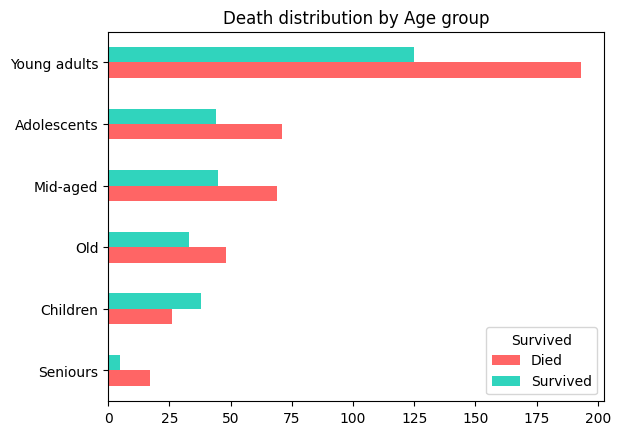

The dataset records 22 passengers in the seniour category.
77.27% of passengers in the seniour category lost their lives, while 22.73% of seniours survived the tragedy.

64 passengers were recorded as children.
40.62% of children lost their lives, while 59.38% of children survived the tragedy.

81 passengers were recorded in the Old age category.
59.26% of passengers in the Old age category lost their lives, while 40.74% of passengers in the Old age survived the tragedy.

114 passengers were recorded in the Middle-age category.
60.53% of passengers in the Middle-age category lost their lives, while 39.47% of passengers in the Middle-age survived the tragedy.

115 passengers were recorded in the Adolescents category.
61.74% of Adolescents lost their lives, while 38.26% of Adolescents survived the tragedy.

And lastly, Most passengers, 318 in total, were Young adults.
60.69% of Young adults lost their lives, while 39.31% of Young adults survived the tragedy.


In [48]:
age_group_d = titanic.groupby(['Age category', 'Survived']).size().unstack().sort_values(by = titanic['Survived'].value_counts().index[0], ascending = True)
ax = age_group_d.plot(kind = 'barh', stacked = False, color = clr)
plt.ylabel('')
plt.title('Death distribution by Age group')
plt.show()
age_group_d

youngadults_death = titanic[(titanic['Age category'] == 'Young adults') & (titanic['Survived'] == 'Died')]
youngadults_death_count = len(youngadults_death) / age_y[5] * 100
youngadults_survival = titanic[(titanic['Age category'] == 'Young adults') & (titanic['Survived'] == 'Survived')]
youngadults_survival_count = len(youngadults_survival) / age_y[5] * 100

adolescents_death = titanic[(titanic['Age category'] == 'Adolescents') & (titanic['Survived'] == 'Died')]
adolescents_death_count = len(adolescents_death) / age_y[4] * 100
adolescents_survival = titanic[(titanic['Age category'] == 'Adolescents') & (titanic['Survived'] == 'Survived')]
adolescents_survival_count = len(adolescents_survival) / age_y[4] * 100

mid_aged_death = titanic[(titanic['Age category'] == 'Mid-aged') & (titanic['Survived'] == 'Died')]
mid_aged_death_count = len(mid_aged_death) / age_y[3] * 100
mid_aged_survival = titanic[(titanic['Age category'] == 'Mid-aged') & (titanic['Survived'] == 'Survived')]
mid_aged_survival_count = len(mid_aged_survival) / age_y[3] * 100

old_death = titanic[(titanic['Age category'] == 'Old') & (titanic['Survived'] == 'Died')]
old_class_death_count = len(old_death) / age_y[2] * 100
old_class_survival = titanic[(titanic['Age category'] == 'Old') & (titanic['Survived'] == 'Survived')]
old_class_survival_count = len(old_class_survival) / age_y[2] * 100

children_death = titanic[(titanic['Age category'] == 'Children') & (titanic['Survived'] == 'Died')]
children_death_count = len(children_death) / age_y[1] * 100
children_survival = titanic[(titanic['Age category'] == 'Children') & (titanic['Survived'] == 'Survived')]
children_survival_count = len(children_survival) / age_y[1] * 100

seniours_death = titanic[(titanic['Age category'] == 'Seniours') & (titanic['Survived'] == 'Died')]
seniours_death_count = len(seniours_death) / age_y[0] * 100
seniours_survival = titanic[(titanic['Age category'] == 'Seniours') & (titanic['Survived'] == 'Survived')]
seniours_survival_count = len(seniours_survival) / age_y[0] * 100

print(f"The dataset records {age_y[0]} passengers in the seniour category.")
print(f"{seniours_death_count:.2f}% of passengers in the seniour category lost their lives, while "
          f"{seniours_survival_count:.2f}% of seniours survived the tragedy.")
print()
print(f"{age_y[1]} passengers were recorded as children.")
print(f"{children_death_count:.2f}% of children lost their lives, while "
          f"{children_survival_count:.2f}% of children survived the tragedy.")
print()
print(f"{age_y[2]} passengers were recorded in the Old age category.")
print(f"{old_class_death_count:.2f}% of passengers in the Old age category lost their lives, while "
          f"{old_class_survival_count:.2f}% of passengers in the Old age survived the tragedy.")
print()
print(f"{age_y[3]} passengers were recorded in the Middle-age category.")
print(f"{mid_aged_death_count:.2f}% of passengers in the Middle-age category lost their lives, while "
          f"{mid_aged_survival_count:.2f}% of passengers in the Middle-age survived the tragedy.")
print()
print(f"{age_y[4]} passengers were recorded in the Adolescents category.")
print(f"{adolescents_death_count:.2f}% of Adolescents lost their lives, while "
          f"{adolescents_survival_count:.2f}% of Adolescents survived the tragedy.")
print()
print(f"And lastly, Most passengers, {age_y[5]} in total, were Young adults.")
print(f"{youngadults_death_count:.2f}% of Young adults lost their lives, while "
          f"{youngadults_survival_count:.2f}% of Young adults survived the tragedy.")

In [30]:
from scipy.stats import chi2_contingency

# Create a contingency table of Pclass and Survived
contingency_table = pd.crosstab(titanic['Pclass'], titanic['Survived'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check the p-value to determine significance
if p < 0.05:
    print("There is a significant relationship between Passenger Class and Survival.")
else:
    print("There is no significant relationship between Passenger Class and Survival.")


There is a significant relationship between Passenger Class and Survival.
